# BÁO CÁO PHÂN TÍCH KHÁM PHÁ DỮ LIỆU (EDA) - IRIS DATASET

**Mục tiêu:**
1. Tải và làm sạch dữ liệu bộ hoa Iris.
2. Thống kê mô tả và trực quan hóa các mối quan hệ giữa các đặc trưng.
3. Chuẩn hóa dữ liệu để chuẩn bị cho các bước huấn luyện mô hình Machine Learning.

In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler

# Cấu hình hiển thị
pd.set_option("display.precision", 3)
import warnings
warnings.filterwarnings('ignore') # Tắt các cảnh báo không cần thiết

## 1. Tải và Kiểm tra Dữ liệu
Dữ liệu được tải từ thư viện `scikit-learn`. Chúng ta sẽ gộp bảng đặc trưng (Features) và nhãn (Target) thành một DataFrame hoàn chỉnh để thuận tiện cho việc xử lý.

In [16]:
# Nạp dữ liệu
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)     # Bảng đặc trưng
y = pd.Series(iris.target, name="target")                   # Nhãn phân loại

# Ghép thành bảng hoàn chỉnh
df = pd.concat([X, y], axis=1)

# Hiển thị thông tin cơ bản
print(f"Kích thước dữ liệu: {df.shape}")
print(f"Danh sách đặc trưng: {iris.feature_names}")
print(f"Danh sách nhãn: {iris.target_names.tolist()}")

# Kiểm tra kiểu dữ liệu
df.info()

Kích thước dữ liệu: (150, 5)
Danh sách đặc trưng: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Danh sách nhãn: ['setosa', 'versicolor', 'virginica']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [17]:
# Hiển thị 5 dòng đầu tiên
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## 2. Thống kê Mô tả
Bước này giúp chúng ta nắm bắt được phân phối của dữ liệu thông qua các chỉ số:
* **Mean (Trung bình):** Giá trị trung tâm của đặc trưng.
* **Std (Độ lệch chuẩn):** Mức độ phân tán của dữ liệu.

In [18]:
# Tính toán các chỉ số thống kê
stats = df.describe().loc[["mean", "std", "min", "max"]]
stats

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
mean,5.843,3.057,3.758,1.199,1.000
std,0.828,0.436,1.765,0.762,0.819
min,4.300,2.000,1.000,0.100,0.000
max,7.900,4.400,6.900,2.500,2.000


## 3. Trực quan hóa (Pairplot)
Sử dụng biểu đồ cặp (Pairplot) để quan sát mối tương quan giữa từng cặp đặc trưng. Màu sắc (`hue`) được sử dụng để phân biệt các loài hoa (Setosa, Versicolor, Virginica).

**Nhận xét kỳ vọng:**
* Các loài hoa có thể tách biệt rõ ràng dựa trên một số đặc trưng nhất định (ví dụ: kích thước cánh hoa).

<Figure size 1200x800 with 0 Axes>

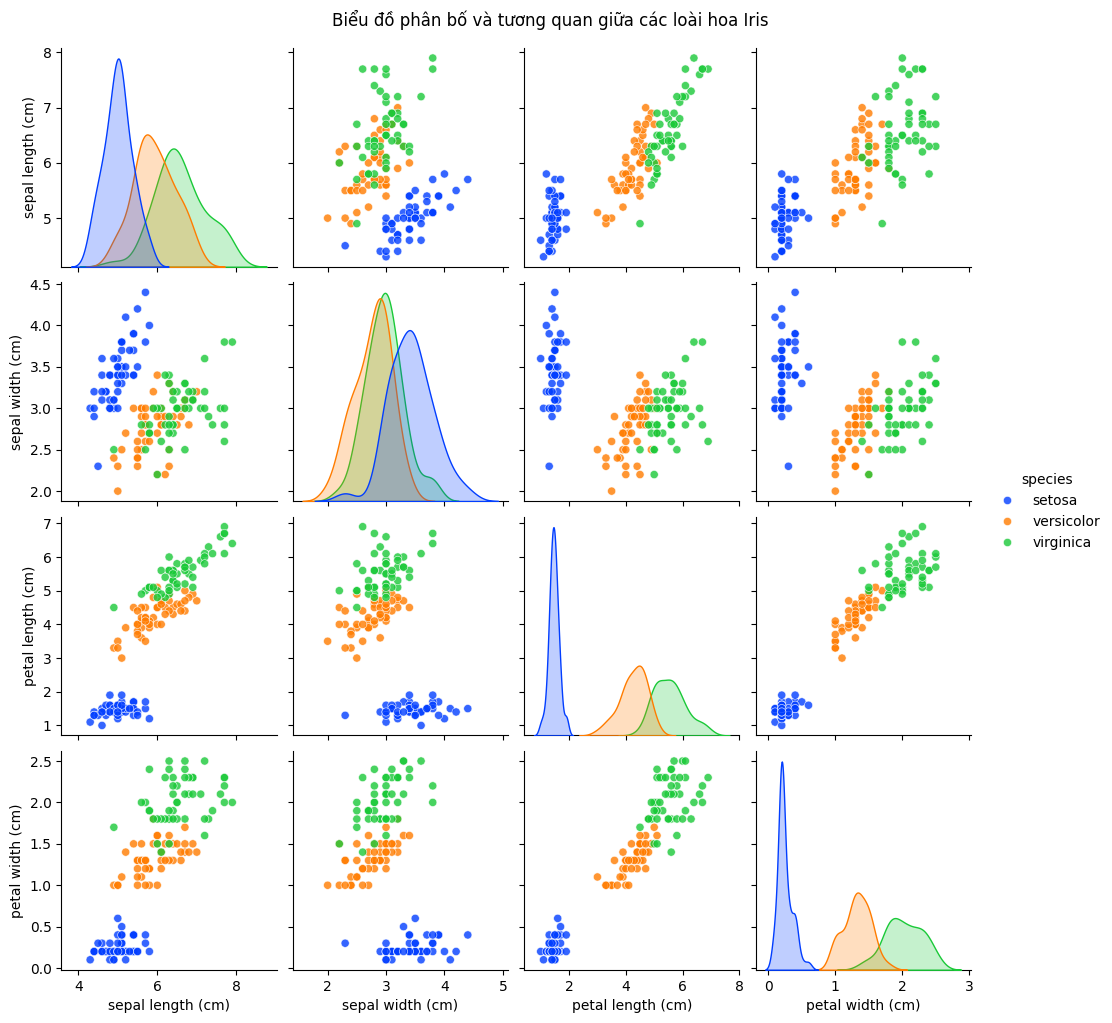

In [19]:
# Tạo bản sao và gán tên loài hoa để biểu đồ dễ hiểu hơn
df_named = df.copy()
df_named["species"] = df_named["target"].map(
    {i: name for i, name in enumerate(iris.target_names)}
)

# Vẽ biểu đồ
plt.figure(figsize=(12, 8))
sns.pairplot(
    data=df_named,
    vars=iris.feature_names,
    hue="species",
    diag_kind="kde",            # Biểu đồ mật độ ở đường chéo chính
    palette="bright",
    plot_kws={"alpha": 0.8, "s": 35}
)
plt.suptitle("Biểu đồ phân bố và tương quan giữa các loài hoa Iris", y=1.02)
plt.show()

## 4. Chuẩn hóa Dữ liệu (Min-Max Scaling)
Vì các đặc trưng có thể có thang đo khác nhau, chúng ta sử dụng `MinMaxScaler` để đưa tất cả dữ liệu về khoảng `[0, 1]`. Điều này đặc biệt hữu ích cho các thuật toán như KNN hoặc Neural Networks.

In [20]:
scaler = MinMaxScaler()

# Fit và Transform dữ liệu
X_scaled_values = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled_values, columns=X.columns)

# So sánh trước và sau khi chuẩn hóa
print("--- Trước chuẩn hóa (3 dòng đầu) ---")
display(X.head(3))

print("\n--- Sau chuẩn hóa (3 dòng đầu) ---")
display(X_scaled.head(3))

--- Trước chuẩn hóa (3 dòng đầu) ---


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2



--- Sau chuẩn hóa (3 dòng đầu) ---


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0.222,0.625,0.068,0.042
1,0.167,0.417,0.068,0.042
2,0.111,0.500,0.051,0.042


## 5. Kết luận và Lưu trữ
Dữ liệu sau khi được làm sạch và chuẩn hóa sẽ được lưu lại dưới dạng file CSV để phục vụ cho các bước huấn luyện mô hình tiếp theo.

In [21]:
# Ghép lại với cột target
df_scaled = pd.concat([X_scaled, y], axis=1)

# Lưu file
output_filename = "../data/iris_scaled.csv"
df_scaled.to_csv(output_filename, index=False, encoding="utf-8")

print(f"Đã lưu thành công file: {output_filename}")

Đã lưu thành công file: ../data/iris_scaled.csv
